<a href="https://colab.research.google.com/github/rpizarrog/simulacion/blob/main/python%20casos/Caso_14_Variables_aleatorias_contnuas_Distribuci%C3%B3n_normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribución normal

Existen distintas distribuciones que permiten tratar con variables aleatorias continuas

- Distribución uniforme continua
- **Distribución normal**
- Distribución t student
- Distribucuón exponencial
- Distribución chi cuadrada
- Distribución f de Fisher
- Entre otras....

La distribución normal visualmente tiene forma de campana, simétrica alrededor de la media.

Se utiliza para modelar datos en muchas aplicaciones, desde la altura de las personas hasta errores de medición y mucho más.

Fórmula para la densidad de una distribución normal.

$$
f(x) =\frac{1}{\sigma \cdot \sqrt{2 \cdot \pi}}\cdot e
^{\frac{-1}{2}\cdot ( \frac {x - \mu}{\sigma}) ^2}
$$

En donde se necesita el valor de la media poblacional  $\mu$, la desviación estándar $\sigma$,  valor de $pi$ aproximado $\pi \approx 3.14159$, el valor constante matemática aproximado $e \approx 2.71828$.

# Objetivo

Generar n números aleatorios de la disribución normal y visualizar su histograma y densidad.

Calcular probabilidades con los datos generados basados en un intervalo inicialmente establecido.

# Desarrollo

Existen diversas alternativas para generar números aleatorios de variables continuas en Python.

Este caso se ajsutará a utilizar la bilioteca *from scipy.stats* y la correspondiente distribución. A la distribución normal.

## Cargar librerías


In [ ]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# from scipy.stats import uniform  # uniforme continua
from scipy.stats import norm # normal

# from IPython.display import display, HTML # Para html tablas ...

## Crear funciones



In [ ]:
def f_visualizar_histograma_continua (datos, k):
  # Crear un gráfico de distribución de la variable continua
  sns.histplot(data=datos, kde=True)
  plt.xlabel(datos.columns[0])
  plt.ylabel('Frecuencia')
  plt.title('Distribución de Variable Continua')
  plt.show()

# Recibe una datos con una variable continua y el número de cortes o clases
# que sirven para construir tabla basados en los k clases
def f_construye_tabla_distribucion_continua(datos, k):
  # Crear una tabla de frecuencia
  tabla_frecuencia = pd.cut(datos.iloc[:, 0], bins=k, include_lowest=True).value_counts().reset_index()
  tabla_frecuencia.columns = ['Clase', 'Frec']
  # tabla_frecuencia

  # Ordenar la tabla de frecuencia por el intervalo
  tabla_frecuencia = tabla_frecuencia.sort_values(by='Clase')
  tabla_frecuencia = tabla_frecuencia.reset_index(drop=True) # Regenera index

  # Generar columnas siguientes
  tabla_frecuencia['Frec Rel'] = tabla_frecuencia['Frec'] / n
  tabla_frecuencia['Frec Porc'] = tabla_frecuencia['Frec'] / n * 100
  tabla_frecuencia['Frec Ac'] = tabla_frecuencia['Frec'].cumsum()

  return tabla_frecuencia

## Crear semilla


In [ ]:
random.seed(2023) ## semilla año 2023

## Ejercicio

La estatura promedio de los alumnos varones del ITD con media y desviación estándar.

Se generan $3500$ estaturas de varones con estatura en media igual a $170$ cms y $10$ cms de desviación estándar.

$$
\mu = 170
$$
$$
\sigma = 10
$$

In [ ]:
media = 170
desv_std = 10
n = 3500 # alumnos del ITD

# Genera 100 valores aleatorios de una distribución normal
numeros_aleatorios = norm.rvs(loc=media, scale=desv_std, size=n)

## Visualizar histograma y densidad de distribución normal


     estaturas
0   168.378893
1   181.288623
2   168.614333
3   179.032060
4   181.183213
..         ...
95  188.950312
96  170.409851
97  153.074144
98  168.707183
99  161.233205

[100 rows x 1 columns]
       estaturas
3400  162.677249
3401  195.915386
3402  174.982236
3403  160.099614
3404  187.060915
...          ...
3495  177.125906
3496  167.921089
3497  175.455408
3498  189.823660
3499  174.454742

[100 rows x 1 columns]


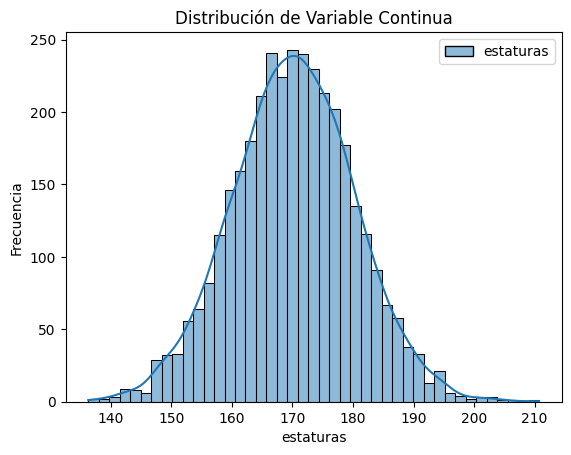

In [ ]:
# Convergir los números aleatoios a un data.frame
datos = pd.DataFrame({"estaturas" :numeros_aleatorios})

# Los primeros y últimos 100
print(datos.head(100))
print(datos.tail(100))
k = 7 # Numero de cortes o divisiones o clases


f_visualizar_histograma_continua (datos, k)

## Curva de densidad y probabilidad área bajo la curva

Se muestra sólo la densidad de la curva con los datos de estaturas.

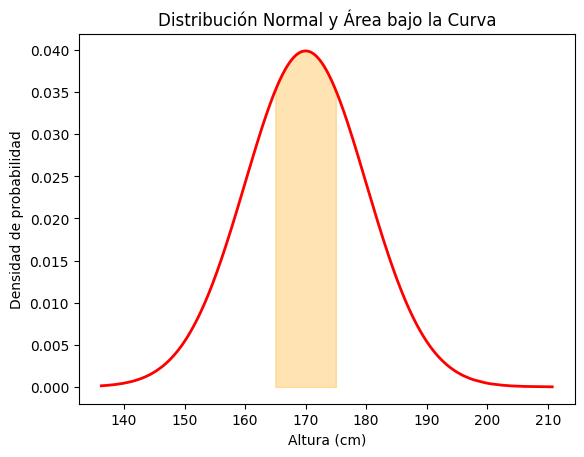

In [ ]:
# Parámetros del intervalo
intervalo_a = 165
intervalo_b = 175

# Crear un gráfico de densidad de la distribución normal

# Crear una secuencia de valores entre el valor mínimo y máximo de los datos
x = np.sort(datos['estaturas']) # que vayan ordenados

# Calcular la densidad de probabilidad para la distribución normal
dens = norm.pdf(x, media, desv_std)

# Dibujar la curva de densidad de probabilidad
plt.plot(x, dens, 'r-', lw=2)

# Resaltar el área bajo la curva entre 165 y 175
x_fill = np.linspace(start=intervalo_a, stop=intervalo_b)
y_fill = norm.pdf(x_fill, media, desv_std)
plt.fill_between(x_fill, y_fill, alpha=0.3, color='orange')

# Etiquetas y título del gráfico
plt.xlabel('Altura (cm)')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución Normal y Área bajo la Curva')

# Mostrar el gráfico
plt.show()

## Probabilidad

¿Cuál es la probabilidad de encontrar alumnos varones que midan entre 165 y 175 de estatura?

In [ ]:
# Calcular la probabilidad usando norm.cdf
probabilidad = norm.cdf(intervalo_b, loc=media, scale=desv_std) - norm.cdf(intervalo_a, loc=media, scale=desv_std)
probabilidad = probabilidad * 100

print(f"La probabilidad de encontrar alumnos de estatura entre {intervalo_a:.2f} y {intervalo_b:.2f} de estatura es: {probabilidad:.2f} %")
print ("Es lo que representa el área amarilla con respecto al 100% en la imagen anterior")

La probabilidad de encontrar alumnos de estatura entre 165.00 y 175.00 de estatura es: 38.29 %
Es lo que representa el área amarilla con respecto al 100% en la imagen anterior


# Interpretación

- ¿Que significa la curva de Gauss de una distribución  normal y cómo se interpreta?
- Para qué se utiliza una distribución normal?. De un ejemplo?